In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob 

In [3]:
glob.glob(r'C:\Users\Asus\Desktop\data python project\TimeSeries\individual_stocks_5yr\*csv')

['C:\\Users\\Asus\\Desktop\\data python project\\TimeSeries\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\Asus\\Desktop\\data python project\\TimeSeries\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\Asus\\Desktop\\data python project\\TimeSeries\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\Asus\\Desktop\\data python project\\TimeSeries\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\Asus\\Desktop\\data python project\\TimeSeries\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\Asus\\Desktop\\data python project\\TimeSeries\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\Asus\\Desktop\\data python project\\TimeSeries\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\Asus\\Desktop\\data python project\\TimeSeries\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\Asus\\Desktop\\data python project\\TimeSeries\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\Asus\\Desktop\\data python project\\TimeSeries\\individual_stocks_5yr\\ADM_data.csv',
 'C:\\U

In [4]:
len(glob.glob(r'C:\Users\Asus\Desktop\data python project\TimeSeries\individual_stocks_5yr\*csv'))

505

In [5]:
## use Warnings package to get rid of any future warning ..

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
company_list = [
    r'C:\\Users\\Asus\\Desktop\\data python project\\TimeSeries\\individual_stocks_5yr\\AAPL_data.csv',
    r'C:\\Users\\Asus\\Desktop\\data python project\\TimeSeries\\individual_stocks_5yr\\AMZN_data.csv',
    r'C:\\Users\\Asus\\Desktop\\data python project\\TimeSeries\\individual_stocks_5yr\\GOOG_data.csv',
    r'C:\\Users\\Asus\\Desktop\\data python project\\TimeSeries\\individual_stocks_5yr\\MSFT_data.csv'
    
]

In [7]:
all_data = pd.DataFrame()

for file in company_list:
    
    current_df = pd.read_csv(file)
    
    ##all_data = current_df.append(all_data , ignore_index=True)
    all_data = pd.concat([all_data , current_df] , ignore_index=True)

In [8]:
all_data.shape

(4752, 7)

In [9]:
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [10]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

## Analysing Change in Price OF the Stock Overtime

In [11]:
all_data.isnull() 

date   open   high    low  close  volume   Name
0     False  False  False  False  False   False  False
1     False  False  False  False  False   False  False
2     False  False  False  False  False   False  False
3     False  False  False  False  False   False  False
4     False  False  False  False  False   False  False
...     ...    ...    ...    ...    ...     ...    ...
4747  False  False  False  False  False   False  False
4748  False  False  False  False  False   False  False
4749  False  False  False  False  False   False  False
4750  False  False  False  False  False   False  False
4751  False  False  False  False  False   False  False

[4752 rows x 7 columns]

In [12]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [13]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [14]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [15]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [16]:
tech_list = all_data['Name'].unique()

In [17]:
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

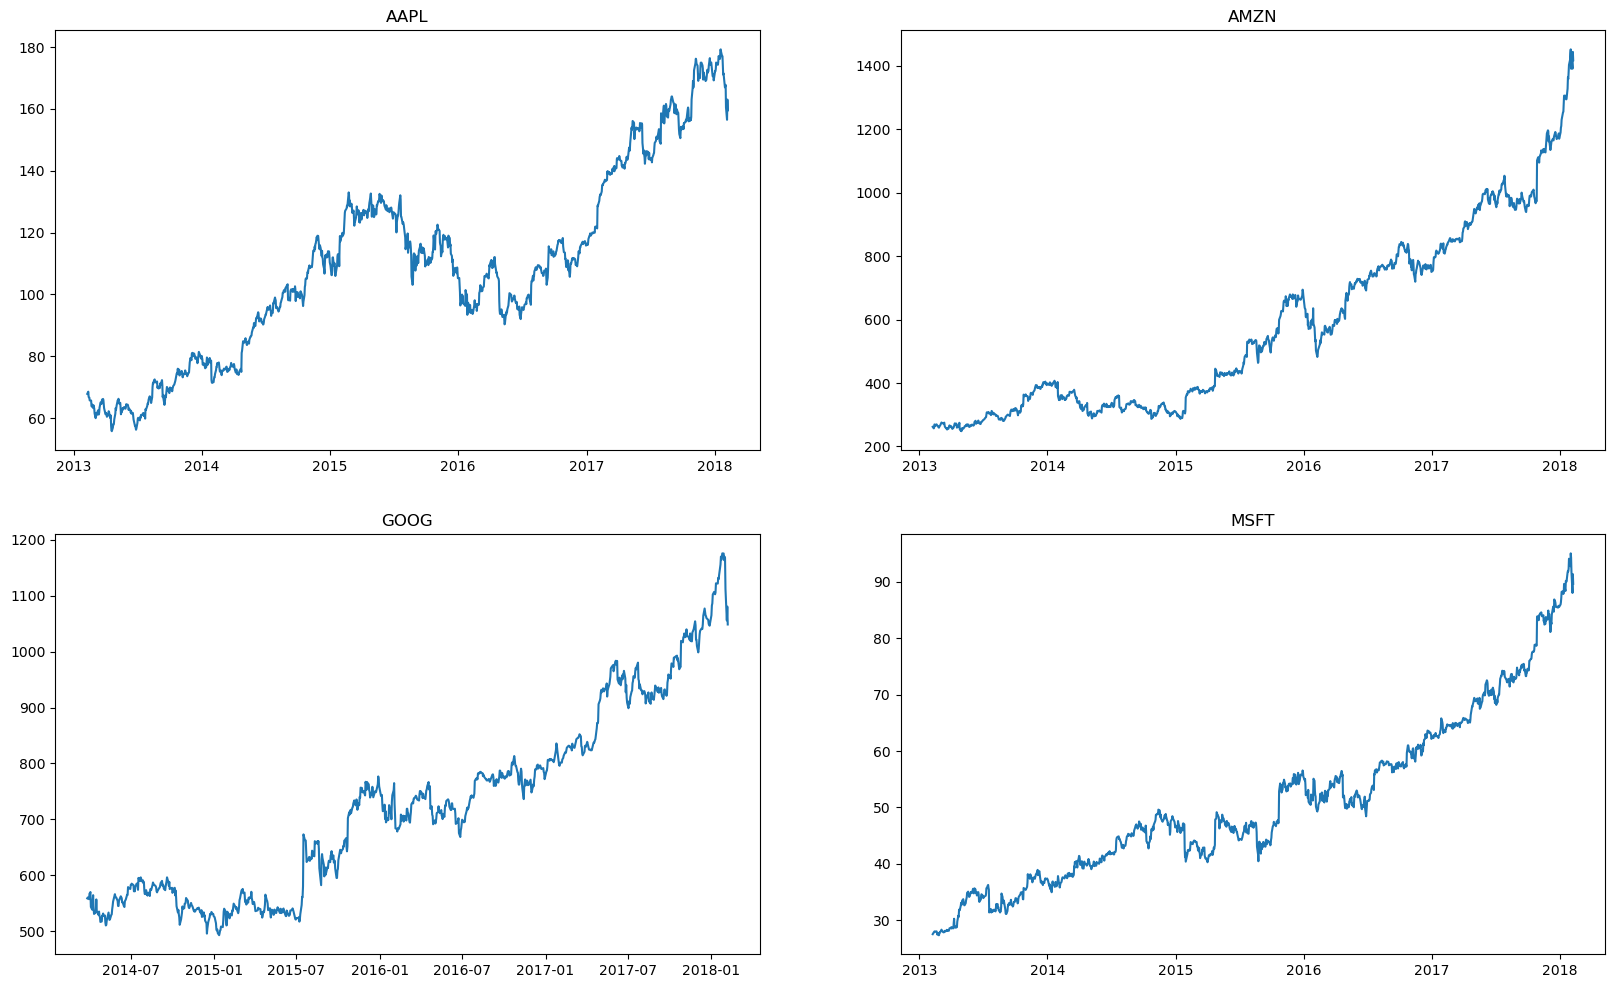

In [18]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(2 , 2 , index) ## creating subplot for each stock
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'] , df['close']) ## plotting "date" vs "close"
    plt.title(company)

## Analysing Moving Average of The Various stock

In [19]:
all_data.head(10)

date     open     high      low    close     volume  Name
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
5 2013-02-15  66.9785  67.1656  65.7028  65.7371   97924631  AAPL
6 2013-02-19  65.8714  66.1042  64.8356  65.7128  108854046  AAPL
7 2013-02-20  65.3842  65.3842  64.1142  64.1214  118891367  AAPL
8 2013-02-21  63.7142  64.1671  63.2599  63.7228  111596821  AAPL
9 2013-02-22  64.1785  64.5142  63.7999  64.4014   82583823  AAPL

In [20]:
all_data['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [21]:
new_data = all_data.copy()

In [22]:
ma_day = [10 ,20 , 50]

for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

In [23]:
new_data.tail(7)

date   open    high      low  close    volume  Name  close_10  \
4745 2018-01-30  93.30  93.660  92.1000  92.74  38635053  MSFT    91.862   
4746 2018-01-31  93.75  95.400  93.5100  95.01  48756338  MSFT    92.349   
4747 2018-02-01  94.79  96.070  93.5813  94.26  47227882  MSFT    92.765   
4748 2018-02-02  93.64  93.970  91.5000  91.78  47867753  MSFT    92.943   
4749 2018-02-05  90.56  93.240  88.0000  88.00  51031465  MSFT    92.582   
4750 2018-02-06  86.89  91.475  85.2500  91.33  67998564  MSFT    92.525   
4751 2018-02-07  90.49  91.770  89.2000  89.61  41107592  MSFT    92.304   

      close_20  close_50  
4745   89.8285   86.5244  
4746   90.2815   86.7606  
4747   90.6770   86.9978  
4748   90.9105   87.1828  
4749   90.9010   87.2684  
4750   91.0535   87.4328  
4751   91.1230   87.5598

In [24]:
new_data.set_index('date' , inplace=True)

In [25]:
new_data

open     high      low    close     volume  Name  close_10  \
date                                                                        
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL       NaN   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL       NaN   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL       NaN   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL       NaN   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL       NaN   
...             ...      ...      ...      ...        ...   ...       ...   
2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT    92.765   
2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT    92.943   
2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT    92.582   
2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT    92.525   
2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT    92.304   

            close_20  close_50  
date                            
2013-02-08       NaN       NaN  
2013-02-11       NaN       NaN  
2013-02-12       NaN       NaN  
2013-02-13       NaN       NaN  
2013-02-14       NaN       NaN  
...              ...       ...  
2018-02-01   90.6770   86.9978  
2018-02-02   90.9105   87.1828  
2018-02-05   90.9010   87.2684  
2018-02-06   91.0535   87.4328  
2018-02-07   91.1230   87.5598  

[4752 rows x 9 columns]

In [26]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

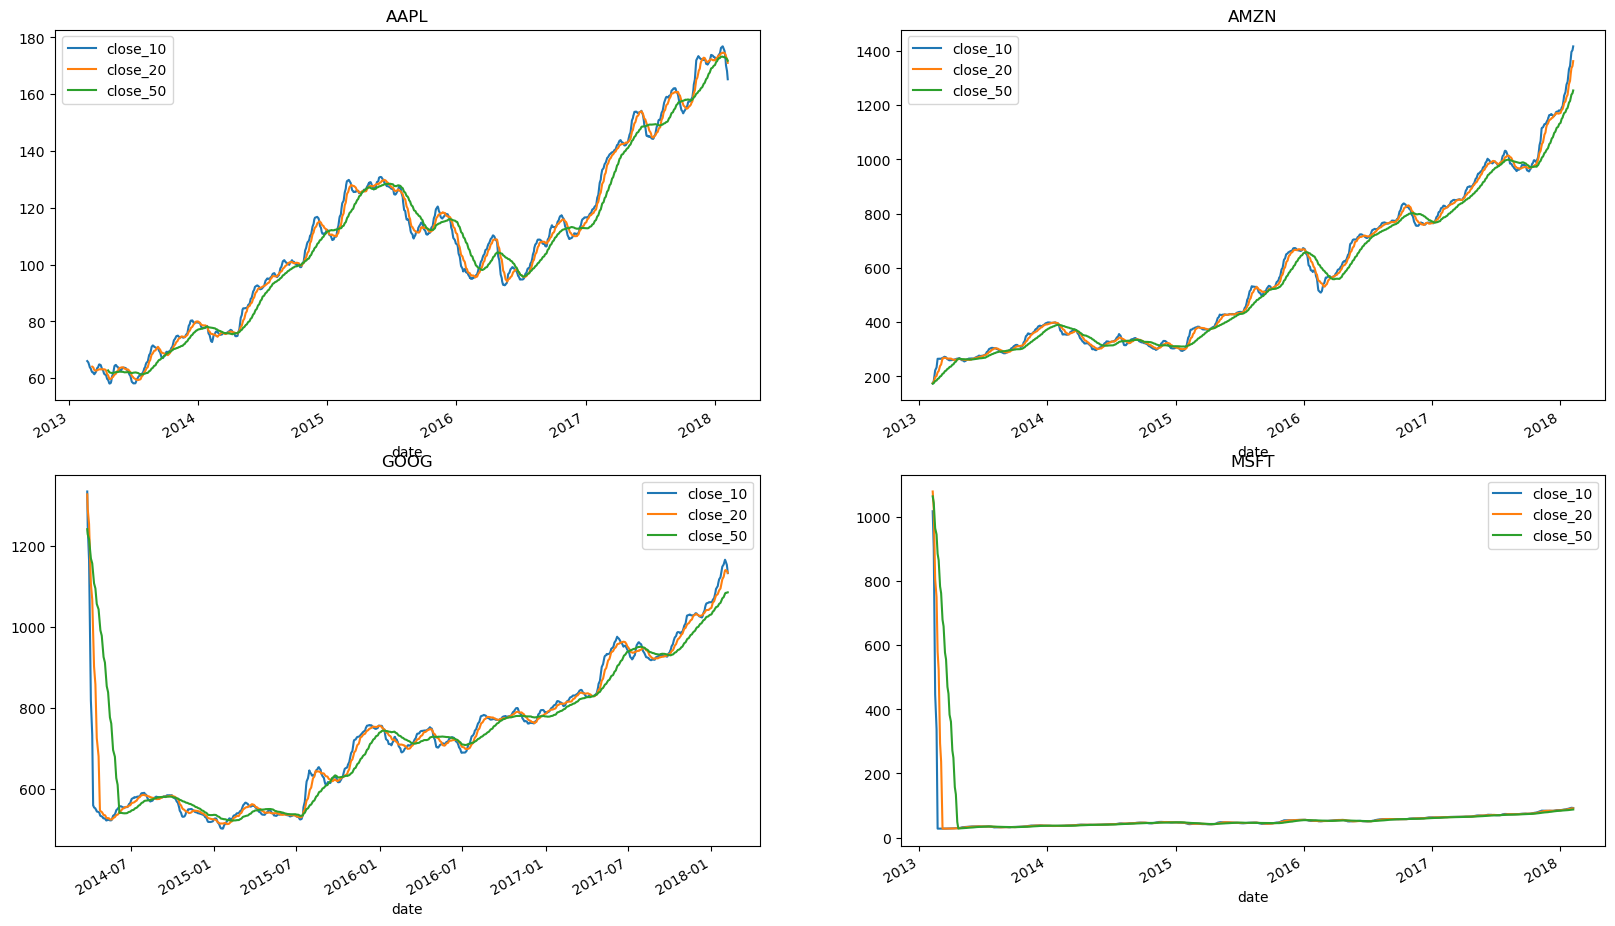

In [27]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(2 , 2 , index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10','close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)

# analyse Closing price change in apple stock 

In [28]:
company_list

['C:\\\\Users\\\\Asus\\\\Desktop\\\\data python project\\\\TimeSeries\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\Asus\\\\Desktop\\\\data python project\\\\TimeSeries\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\Asus\\\\Desktop\\\\data python project\\\\TimeSeries\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\Asus\\\\Desktop\\\\data python project\\\\TimeSeries\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [30]:
apple = pd.read_csv(r'C:\\\\Users\\\\Asus\\\\Desktop\\\\data python project\\\\TimeSeries\\\\individual_stocks_5yr\\\\AAPL_data.csv')

In [31]:
apple.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [33]:
apple['daily_retun(in %)'] =apple['close'].pct_change()*100

In [34]:
apple.head(5)

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   daily_retun(in %)  
0                NaN  
1           1.042235  
2          -2.506658  
3          -0.190297  
4          -0.089934

In [35]:
import plotly.express as px

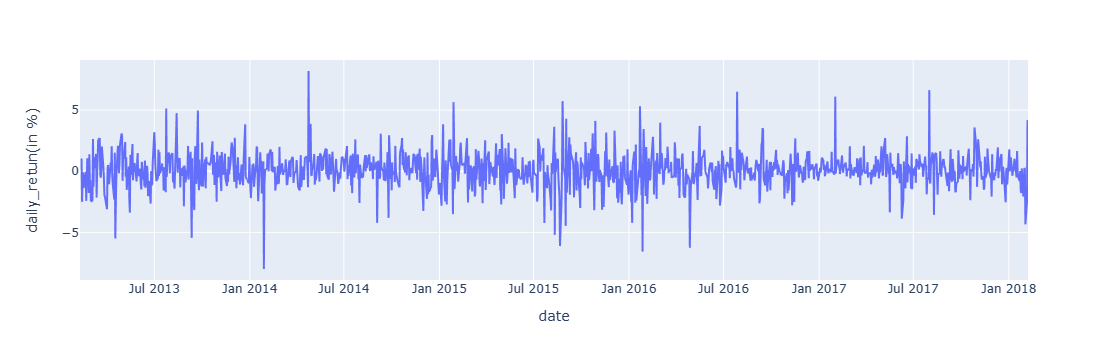

In [36]:
px.line(apple , x = 'date' ,y= 'daily_retun(in %)')

# Performing Resampling Analysis

In [38]:
apple.dtypes

date                  object
open                 float64
high                 float64
low                  float64
close                float64
volume                 int64
Name                  object
daily_retun(in %)    float64
dtype: object

In [39]:
apple['date'] = pd.to_datetime(apple['date'])

In [40]:
apple.dtypes

date                 datetime64[ns]
open                        float64
high                        float64
low                         float64
close                       float64
volume                        int64
Name                         object
daily_retun(in %)           float64
dtype: object

In [44]:
apple.set_index('date', inplace = True )

<Axes: xlabel='date'>

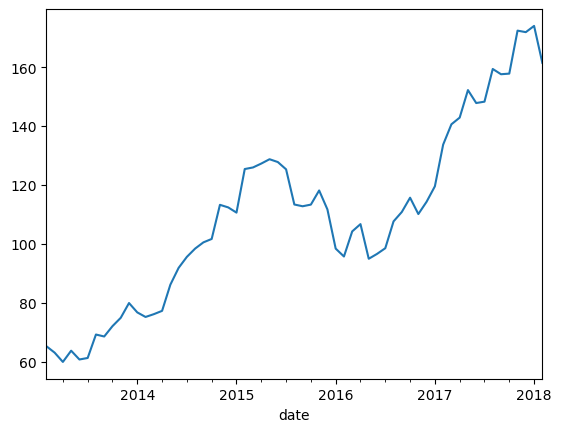

In [46]:
apple['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

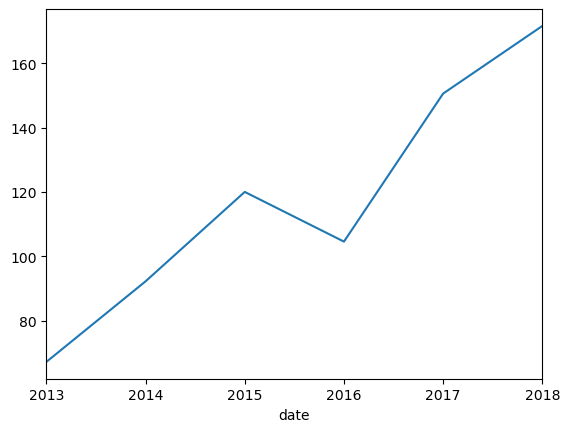

In [47]:
apple['close'].resample('Y').mean().plot()

In [48]:
apple['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

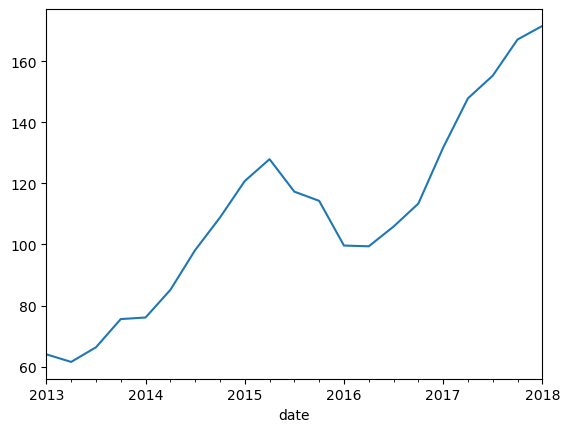

In [49]:
apple['close'].resample('Q').mean().plot()

# performing Multi-Variante analysis to understand CO-Relation

In [50]:
company_list

['C:\\\\Users\\\\Asus\\\\Desktop\\\\data python project\\\\TimeSeries\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\Asus\\\\Desktop\\\\data python project\\\\TimeSeries\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\Asus\\\\Desktop\\\\data python project\\\\TimeSeries\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\Asus\\\\Desktop\\\\data python project\\\\TimeSeries\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [51]:
company_list[0]

'C:\\\\Users\\\\Asus\\\\Desktop\\\\data python project\\\\TimeSeries\\\\individual_stocks_5yr\\\\AAPL_data.csv'

In [54]:
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [53]:
app.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [55]:
closing_price = pd.DataFrame()

In [57]:
closing_price['app_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['google_close'] = google['close']
closing_price['msft_close'] = msft['close']

In [58]:
closing_price.head()

app_close  amzn_close  google_close  msft_close
0    67.8542      261.95        558.46       27.55
1    68.5614      257.21        559.99       27.86
2    66.8428      258.70        556.97       27.88
3    66.7156      269.47        567.16       28.03
4    66.6556      269.24        567.00       28.04

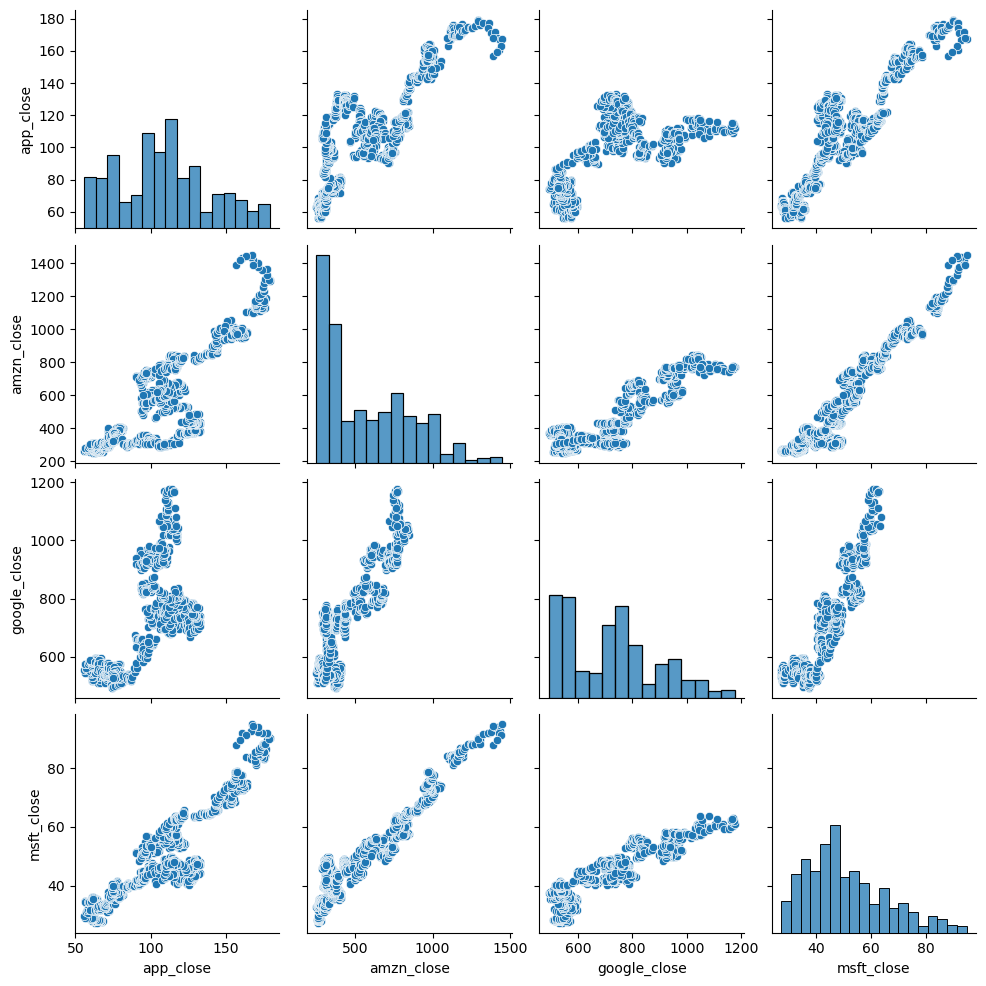

In [59]:
sns.pairplot(closing_price)

In [60]:
closing_price.corr()

app_close  amzn_close  google_close  msft_close
app_close      1.000000    0.819078      0.640522    0.899689
amzn_close     0.819078    1.000000      0.888456    0.955977
google_close   0.640522    0.888456      1.000000    0.907011
msft_close     0.899689    0.955977      0.907011    1.000000

<Axes: >

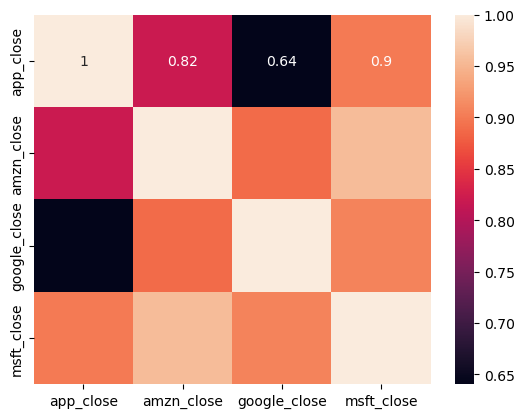

In [61]:
sns.heatmap(closing_price.corr() , annot = True)

# CO-Relation analysis

In [62]:
closing_price

app_close  amzn_close  google_close  msft_close
0       67.8542      261.95        558.46       27.55
1       68.5614      257.21        559.99       27.86
2       66.8428      258.70        556.97       27.88
3       66.7156      269.47        567.16       28.03
4       66.6556      269.24        567.00       28.04
...         ...         ...           ...         ...
1254   167.7800     1390.00           NaN       94.26
1255   160.5000     1429.95           NaN       91.78
1256   156.4900     1390.00           NaN       88.00
1257   163.0300     1442.84           NaN       91.33
1258   159.5400     1416.78           NaN       89.61

[1259 rows x 4 columns]

In [63]:
(closing_price['app_close'] - closing_price['app_close'].shift(1))/closing_price['app_close'].shift(1)*100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: app_close, Length: 1259, dtype: float64

In [64]:
for col in closing_price.columns:
    closing_price[col + '_pct_change']=(closing_price[col] - closing_price[col].shift(1))/closing_price['app_close'].shift(1)*100
    

In [65]:
closing_price.head(2)

app_close  amzn_close  google_close  msft_close  app_close_pct_change  \
0    67.8542      261.95        558.46       27.55                   NaN   
1    68.5614      257.21        559.99       27.86              1.042235   

   amzn_close_pct_change  google_close_pct_change  msft_close_pct_change  
0                    NaN                      NaN                    NaN  
1              -6.985566                 2.254835               0.456862

In [66]:
closing_price.columns

Index(['app_close', 'amzn_close', 'google_close', 'msft_close',
       'app_close_pct_change', 'amzn_close_pct_change',
       'google_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [67]:
closing_p = closing_price[['app_close_pct_change', 'amzn_close_pct_change',
       'google_close_pct_change', 'msft_close_pct_change']]

In [68]:
closing_p

app_close_pct_change  amzn_close_pct_change  google_close_pct_change  \
0                      NaN                    NaN                      NaN   
1                 1.042235              -6.985566                 2.254835   
2                -2.506658               2.173235                -4.404811   
3                -0.190297              16.112431                15.244723   
4                -0.089934              -0.344747                -0.239824   
...                    ...                    ...                      ...   
1254              0.209043             -36.367437                      NaN   
1255             -4.339015              23.810943                      NaN   
1256             -2.498442             -24.890966                      NaN   
1257              4.179181              33.765736                      NaN   
1258             -2.140710             -15.984788                      NaN   

      msft_close_pct_change  
0                       NaN  
1                  0.456862  
2                  0.029171  
3                  0.224407  
4                  0.014989  
...                     ...  
1254              -0.447948  
1255              -1.478126  
1256              -2.355140  
1257               2.127931  
1258              -1.055021  

[1259 rows x 4 columns]

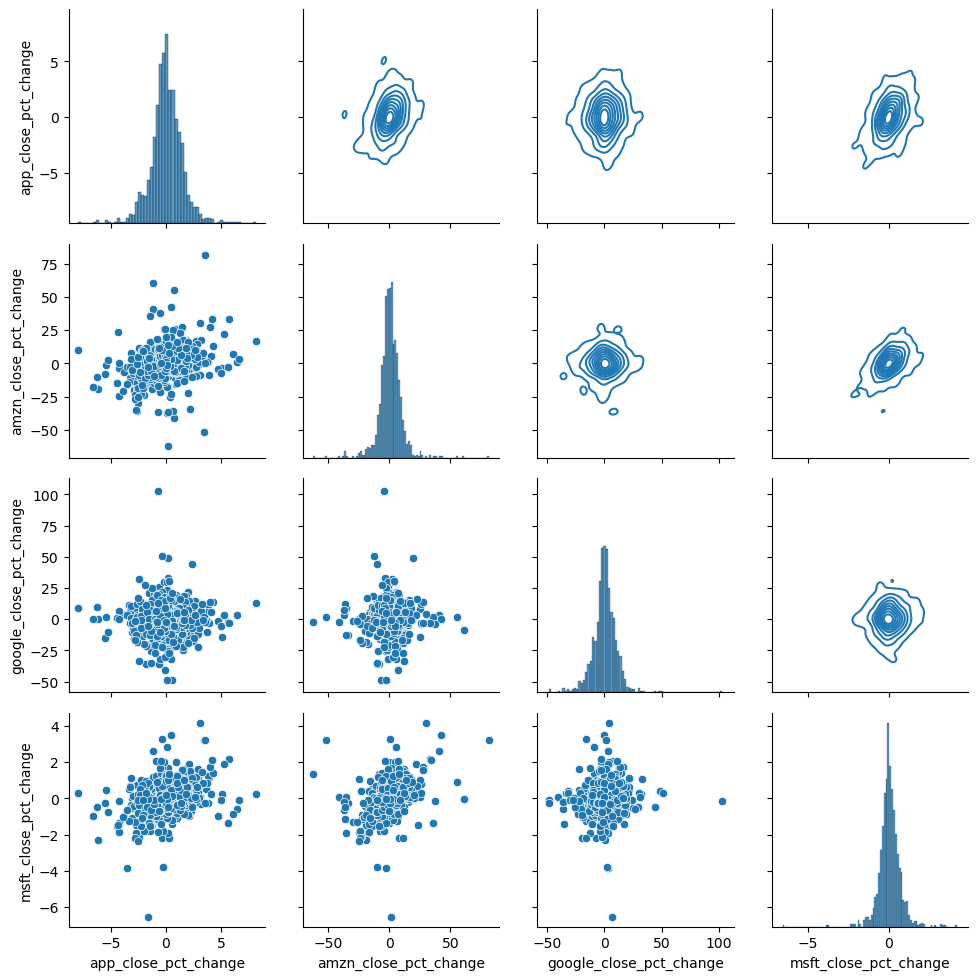

In [71]:
g = sns.PairGrid(data = closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [72]:
closing_p.corr()

app_close_pct_change  amzn_close_pct_change  \
app_close_pct_change                 1.000000               0.295576   
amzn_close_pct_change                0.295576               1.000000   
google_close_pct_change              0.038247               0.030862   
msft_close_pct_change                0.360594               0.408107   

                         google_close_pct_change  msft_close_pct_change  
app_close_pct_change                    0.038247               0.360594  
amzn_close_pct_change                   0.030862               0.408107  
google_close_pct_change                 1.000000               0.051796  
msft_close_pct_change                   0.051796               1.000000